# ZILLOW KAGGLE DATA

## Exercises I
Let's review the steps we take at the beginning of each new module.

1. Create a new repository named regression-exercises in your GitHub; all of your Regression work will be housed here.
1. Clone this repository within your local codeup-data-science directory.
1. Create a .gitignore and make sure your list of 'files to ignore' includes your env.py file.
1. Ceate a README.md file that outlines the contents and purpose of your repository.
1. Add, commit, and push these two files.
1. Now you can add your env.py file to this repository to access the Codeup database server.
1. For these exercises, you will create wrangle.ipynb and wrangle.py files to hold necessary functions.
1. As always, add, commit, and push your work often.
 

In [1]:
import pandas as pd
import numpy as np
import os
from env import hostname, user, password

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

import wrangle 
import warnings 
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

## Exercises II
Let's set up an example scenario as perspective for our regression exercises using the Zillow dataset.

### 1. Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.

## Acquire

<span style="color:blue">Acquire and Summarize
* There are multiple rows in the data where both the bedroomcnt and bathroomcnt columns are set to 0, which is uncommon for residential properties.
* It is noted that there are missing values in the dataset, requiring adjustments in data types, particularly converting them to floats.



In [2]:
df = wrangle.get_zillow_data()
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,propertylandusetypeid
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0,261.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,261.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,261.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0,261.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0,261.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152864 entries, 0 to 2152863
Data columns (total 8 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
 7   propertylandusetypeid         float64
dtypes: float64(8)
memory usage: 131.4 MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2152853.0,3.287195,0.954757,0.00,3.0000,3.000,4.0000,25.00
bathroomcnt,2152853.0,2.230687,0.999281,0.00,2.0000,2.000,3.0000,32.00
calculatedfinishedsquarefeet,2144379.0,1862.855178,1222.125124,1.00,1257.0000,1623.000,2208.0000,952576.00
taxvaluedollarcnt,2152371.0,461896.052361,699675.940049,1.00,188170.0000,327671.000,534527.0000,98428909.00
yearbuilt,2143526.0,1960.949681,22.162196,1801.00,1949.0000,1958.000,1976.0000,2016.00
taxamount,2148422.0,5634.863752,8178.908996,1.85,2534.9725,4108.945,6414.3175,1337755.86
fips,2152864.0,6048.377330,20.433289,6037.00,6037.0000,6037.000,6059.0000,6111.00
propertylandusetypeid,2152864.0,261.000008,0.012268,261.00,261.0000,261.000,261.0000,279.00


In [5]:
df.shape

(2152864, 8)

In [6]:
df.bathroomcnt.value_counts()

2.00     943589
3.00     422841
1.00     414324
2.50     142981
4.00      82155
1.50      31211
3.50      28518
5.00      28362
4.50      19506
0.00      13028
6.00      10747
5.50       6217
7.00       4394
8.00       1692
6.50       1333
9.00        713
7.50        384
10.00       325
11.00       146
8.50        110
12.00        73
9.50         50
13.00        39
14.00        25
15.00        17
0.50         16
10.50        14
16.00        12
18.00         8
20.00         6
17.00         4
1.75          3
12.50         3
11.50         3
19.50         1
14.50         1
32.00         1
19.00         1
Name: bathroomcnt, dtype: int64

In [7]:
df.bedroomcnt.value_counts()

3.0     964298
4.0     634289
2.0     335473
5.0     150866
6.0      25166
1.0      23166
0.0      13188
7.0       4807
8.0       1107
9.0        291
10.0       121
11.0        34
13.0        16
12.0        12
14.0         7
15.0         6
18.0         3
16.0         2
25.0         1
Name: bedroomcnt, dtype: int64

In [8]:
#6037 is LA, 6059 is Orange Cty and 6111 is Ventura
# Los Angeles County, CA    6037
# Orange County, CA         6059
# Ventura County, CA        6111
df.fips.value_counts().loc[[6037, 6059, 6111]]

6037.0    1431812
6059.0     555077
6111.0     165975
Name: fips, dtype: int64

In [9]:
# see how many nulls are in each column
df.isnull().sum() 

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8485
taxvaluedollarcnt                493
yearbuilt                       9338
taxamount                       4442
fips                               0
propertylandusetypeid              0
dtype: int64

### 2. Using your acquired Zillow data, walk through the summarization and cleaning steps in your wrangle.ipynb file like we did above. You may handle the missing values however you feel is appropriate and meaningful; remember to document your process and decisions using markdown and code commenting where helpful.


## Prepare

### Tidy Data 

<span style="color:blue"> Drop unnecessary axis, rename, Find nulls, drop nulls and check preparation

In [10]:
df = df.drop('propertylandusetypeid', axis=1)
df.head(5)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [11]:
df = df.rename(columns={'bedroomcnt':'bedrooms','bathroomcnt':'bathrooms', 'calculatedfinishedsquarefeet':'sqft', 'taxvaluedollarcnt':'home_value', 'taxamount':'sale_tax', 'yearbuilt':'year_built'})
df.head()

,bedrooms,bathrooms,sqft,home_value,year_built,sale_tax,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [12]:

drop_nulls = df.isnull().sum()
drop_nulls


bedrooms        11
bathrooms       11
sqft          8485
home_value     493
year_built    9338
sale_tax      4442
fips             0
dtype: int64

In [13]:
 drop_nulls.sum() / df.shape[0]


0.010581253623080697

In [14]:
df.shape

(2152864, 7)

In [15]:
df = df.dropna()
df.shape


(2140235, 7)

In [16]:
#double check if there are any nulls in fips
df.isnull().any()

bedrooms      False
bathrooms     False
sqft          False
home_value    False
year_built    False
sale_tax      False
fips          False
dtype: bool

In [17]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [18]:
df.head()

,bedrooms,bathrooms,sqft,home_value,year_built,sale_tax,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0


<span style="color:blue">Remove unnecessary data rows where the bedroomcnt is 0 and bathroomcnt 0

In [19]:
df[(df.bedrooms == 0) & (df.bathrooms > 0)]

,bedrooms,bathrooms,sqft,home_value,year_built,sale_tax,fips
10610,0.0,1.0,1112.0,236000.0,1925.0,3456.26,6037.0
10616,0.0,1.0,650.0,182000.0,1899.0,2111.66,6037.0
10620,0.0,1.0,1052.0,157853.0,1925.0,3191.36,6037.0
10630,0.0,1.0,1730.0,350000.0,1928.0,3948.62,6037.0
11186,0.0,7.5,410.0,103442.0,1949.0,1277.60,6111.0
...,...,...,...,...,...,...,...
2135243,0.0,1.0,200.0,26468.0,1925.0,355.80,6037.0
2142004,0.0,1.0,975.0,243000.0,1925.0,4010.13,6037.0
2142018,0.0,1.0,460.0,55000.0,1912.0,1532.89,6037.0
2152705,0.0,1.0,1490.0,152000.0,1930.0,3614.40,6037.0


In [20]:
1052/ df.shape[0]

0.0004915348080935037

In [21]:
nobed_nobath = df[(df.bedrooms == 0) & (df.bathrooms == 0)]
nobed_nobath

,bedrooms,bathrooms,sqft,home_value,year_built,sale_tax,fips
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0
15,0.0,0.0,203.0,14166.0,1960.0,163.79,6037.0
866,0.0,0.0,220.0,13840.0,1988.0,327.80,6037.0
2306,0.0,0.0,1776.0,79574.0,1989.0,1137.90,6037.0
...,...,...,...,...,...,...,...
2144649,0.0,0.0,936.0,33811.0,1961.0,536.25,6037.0
2146190,0.0,0.0,330.0,16311.0,1925.0,297.36,6037.0
2146661,0.0,0.0,676.0,234580.0,1922.0,3013.57,6037.0
2149055,0.0,0.0,938.0,56733.0,1978.0,986.86,6037.0


In [22]:
nobed_nobath.shape

(3345, 7)

In [23]:
nobed_nobath.shape[0] / df.shape[0]

0.0015629124839094772

In [24]:
remove_nobed_nobath = df[(df.bedrooms != 0) & (df.bathrooms != 0) & (df.sqft >= 70)]

In [25]:
remove_nobed_nobath = df[(df.bedrooms == 0) | (df.bathrooms == 0) | (df.sqft <= 70)]
remove_nobed_nobath.shape

(5346, 7)

In [26]:
remove_nobed_nobath.shape[0] / df.shape[0]

0.002497856543790752

<span style="color:blue">less then 02% of removed data is 0 bed 0 bath and <= 70  will be removed getting dropped less then .

In [27]:
df = df[(df.bedrooms != 0) & (df.bathrooms != 0) & (df.sqft >= 70)]
df.shape

(2134889, 7)

In [28]:
df.head(10)

,bedrooms,bathrooms,sqft,home_value,year_built,sale_tax,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0
20,3.0,2.0,1222.0,290492.0,1951.0,3870.25,6037.0
21,4.0,4.0,4144.0,1303522.0,2016.0,14820.10,6037.0
23,3.0,2.5,1821.0,537949.0,2013.0,6173.72,6059.0
24,4.0,3.5,2684.0,644990.0,2014.0,7572.58,6059.0
25,3.0,2.5,2284.0,934353.0,2014.0,13273.94,6059.0


In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,2134889.0,3.308334,0.921154,1.00,3.0,3.00,4.00,25.00
bathrooms,2134889.0,2.245156,0.985615,0.50,2.0,2.00,3.00,32.00
sqft,2134889.0,1864.193200,1162.391100,80.00,1260.0,1624.00,2209.00,952576.00
home_value,2134889.0,460876.957473,674681.826687,22.00,189630.0,328858.00,535000.00,90188462.00
year_built,2134889.0,1960.985115,22.133999,1801.00,1949.0,1958.00,1976.00,2016.00
sale_tax,2134889.0,5619.623870,7784.656871,16.48,2546.7,4116.04,6415.76,1078101.87
fips,2134889.0,6048.304255,20.324563,6037.00,6037.0,6037.00,6059.00,6111.00


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2134889 entries, 4 to 2152863
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   bedrooms    float64
 1   bathrooms   float64
 2   sqft        float64
 3   home_value  float64
 4   year_built  float64
 5   sale_tax    float64
 6   fips        float64
dtypes: float64(7)
memory usage: 130.3 MB


<span style="color:blue"> Convert floats to integers

In [31]:
df['year_built'] = df.year_built.astype(int).astype(str)

In [32]:
df.year_built.describe()

count     2134889
unique        153
top          1955
freq        84195
Name: year_built, dtype: object

In [33]:
df['bedrooms'] = df.bedrooms.astype(int)

In [34]:
df.bedrooms.describe()

count    2.134889e+06
mean     3.308334e+00
std      9.211544e-01
min      1.000000e+00
25%      3.000000e+00
50%      3.000000e+00
75%      4.000000e+00
max      2.500000e+01
Name: bedrooms, dtype: float64

In [35]:
df.bedrooms.value_counts()

3     962633
4     633361
2     334071
5     150594
6      25104
1      22749
7       4791
8       1102
9        290
10       118
11        33
13        15
12        12
14         6
15         5
16         2
18         2
25         1
Name: bedrooms, dtype: int64

### <span style="color:blue"> FINDINGS

#### <span style="color:blue"> Outliers would be any homes with more than 8 bedrooms rooms which accounts for 484 rows that will be removed

In [36]:
484 /df.shape[0]

0.00022670967905122935

In [37]:
df['bathrooms'] = df.bathrooms.astype(int)

In [38]:
df.bathrooms.describe()

count    2.134889e+06
mean     2.191289e+00
std      9.687137e-01
min      0.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.200000e+01
Name: bathrooms, dtype: float64

In [39]:
df.bathrooms.value_counts()

2     1085133
3      450814
1      442930
4      101497
5       34496
6       12044
7        4759
8        1788
9         754
10        335
11        148
12         75
13         38
14         24
15         15
0          14
16          9
18          6
20          4
17          3
19          2
32          1
Name: bathrooms, dtype: int64

#### <span style="color:blue"> Outliers would be any homes with "0" bathrooms and any bathroom over more than 10 or more bathrooms which accounts for 671 rows that will be removed

In [40]:
671 /df.shape[0]

0.00031430205504829527

In [41]:
#DO NOT need to Describe Fips because they are county codes for LA, Ventura, and Orange County
df['fips'] = df.fips.astype(int).astype(str)

In [42]:
df['sqft'] = df.sqft.astype(int)

In [43]:
df.sqft.describe()

count    2.134889e+06
mean     1.864193e+03
std      1.162391e+03
min      8.000000e+01
25%      1.260000e+03
50%      1.624000e+03
75%      2.209000e+03
max      9.525760e+05
Name: sqft, dtype: float64

In [44]:
# check changes
df.head()

,bedrooms,bathrooms,sqft,home_value,year_built,sale_tax,fips
4,4,2,3633,296425.0,2005,6941.39,6037
6,3,4,1620,847770.0,2011,10244.94,6037
7,3,2,2077,646760.0,1926,7924.68,6037
18,3,1,1244,169471.0,1950,2532.88,6037
19,3,2,1300,233266.0,1950,3110.99,6037


<Axes: >

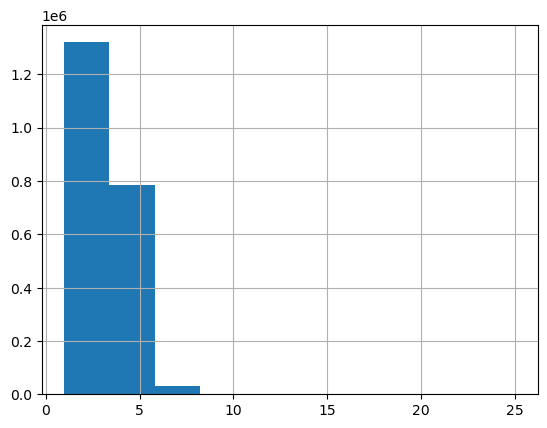

In [45]:
df.bedrooms.hist(bins=10)

In [46]:
df.bedrooms.value_counts()

3     962633
4     633361
2     334071
5     150594
6      25104
1      22749
7       4791
8       1102
9        290
10       118
11        33
13        15
12        12
14         6
15         5
16         2
18         2
25         1
Name: bedrooms, dtype: int64

### 3. Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe with no missing values in your wrangle.py file. Name your final function wrangle_zillow.

### NECESSARY FUNCTIONS

In [47]:
def remove_outliers(df):
    #eliminate outliers
    df = df[df.bathrooms <= 9]
    df = df[df.bedrooms <= 8]
    df = df[df.home_value < 2_000_000]
    return df

In [48]:
df.shape

(2134889, 7)

Cleaned Data / Original Data

In [49]:
2134889/2152863

0.9916511176047895

In [50]:
def drop_propertylandusetypeid(df):
    df = df.drop('propertylandusetypeid', axis=1)
    return df

In [51]:
def drop_nulls(df):
    df = df.dropna()
    return df

In [52]:
def remove_nobed_nobath(df):
    df = df[(df.bedrooms != 0) & (df.bathrooms != 0) & (df.sqft >= 70)]
    return df

In [53]:
def wrangled_zillow(df):
    # df = drop_propertylandusetypeid(df)
    df = drop_nulls(df)
    df = drop_nobed_nobath(df)
    df = remove_outliers(df)
    df.to_csv("zillow.csv", index=False)
    return df

In [54]:
def split_zillow(df):
    #df = train_validate_test(df)
    train_validate, test = train_test_split(df, test_size=0.2, random_state=123, stratify=df.fips)
    #stratify is used for categorical data
    train, validate = train_test_split(train_validate, test_size=0.25, random_state=123, stratify=train_validate.fips)
    #Stratified by county for an even distribution on the train validate test data sets
    return train, validate, test
    #go back and stratify properly on fips